## Урок 6

### Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. 

### Корреляционный анализ

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

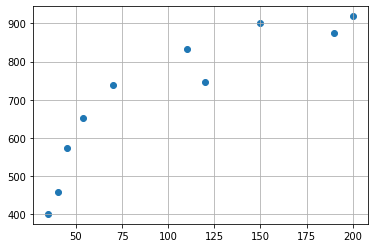

In [2]:
plt.scatter(zp, ks)
plt.grid()

In [3]:
d = {'zp': zp, 'ks': ks}
my_df = pd.DataFrame(data=d)
# mm.reset_index(inpalce=True)
my_df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


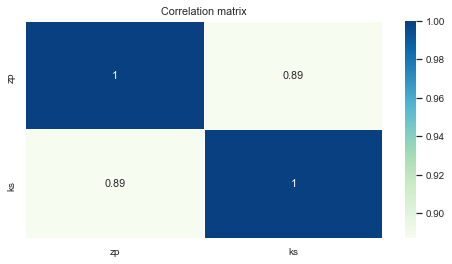

In [4]:
# Построим матрицу корреляций
import seaborn as sns

plt.figure(figsize = (8,4))

sns.set(font_scale=0.9)
sns.heatmap( my_df.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')
# sns.heatmap(my_df.corr())
plt.title('Correlation matrix')
plt.show()

найти ковариацию можно по формуле:
$$ cov_{XY} =  M(XY) - M(X)M(Y)$$

In [5]:
cov = np.mean(zp * ks) - (np.mean(zp) * np.mean(ks))
cov

9157.839999999997

In [6]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [7]:
sigma_X = np.std(zp, ddof=0)
sigma_Y = np.std(ks, ddof=0)

In [8]:
sigma_X

59.115480206118605

In [9]:
sigma_Y

174.55340157098058

Найти коэффициент корреляции Пирсона можно по формуле:
$$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$$

In [10]:
cov / (sigma_X * sigma_Y)

0.8874900920739158

In [11]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

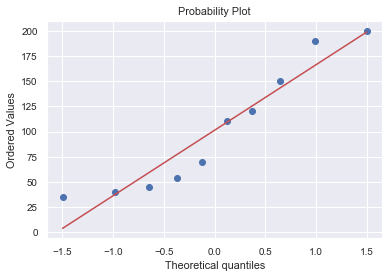

In [12]:
import pylab
import scipy.stats as stats

stats.probplot(zp, dist='norm', plot=pylab)
pylab.show()

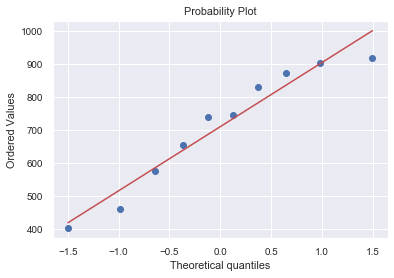

In [13]:
stats.probplot(ks, dist='norm', plot=pylab)
pylab.show()

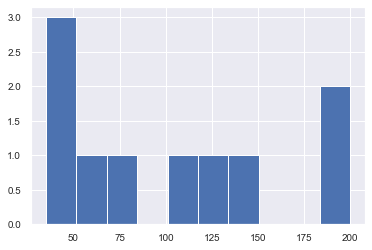

In [14]:
my_df['zp'].hist()

In [ ]:
# from scipy.stats import ttest_ind, mannwhitneyu
# mannwhitneyu(my_df['zp'], my_df['ks'])
# my_df.describe()

#### 2. Измерены значения IQ выборки студентов,

обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [15]:
my_list = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
my_std = np.std(my_list, ddof=1)
my_mean = np.mean(my_list)

In [16]:
print(f"Доверительный интервал (правая граница) с надежностью 0.95 = {my_mean + (2.262 * (my_std / np.sqrt(len(my_list))))}")

Доверительный интервал (правая граница) с надежностью 0.95 = 125.64339223691834


In [17]:
print(f"Доверительный интервал (левая граница) с надежностью 0.95 = {my_mean - (2.262 * (my_std  / np.sqrt(len(my_list))))}")

Доверительный интервал (левая граница) с надежностью 0.95 = 110.55660776308164


#### 3. Известно, что рост футболистов в сборной распределен нормально

с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.

In [18]:
my_D = 25
my_n= 27
my_X = 174.2
my_std = np.sqrt(my_D)

In [19]:
print(f"Доверительный интервал (правая граница) с надежностью 0.95 = {my_X + (1.96 * (my_std / np.sqrt(27)))}")

Доверительный интервал (правая граница) с надежностью 0.95 = 176.08601087935276


In [20]:
print(f"Доверительный интервал (левая граница) с надежностью 0.95 = {my_X - (1.96 * (my_std / np.sqrt(27)))}")

Доверительный интервал (левая граница) с надежностью 0.95 = 172.31398912064722
